In [ ]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv('Mall_Customers.csv')

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.rename (columns = {'Gender': 'gender', 'Age': 'age', 'Annual Income (k$)' :'income', 'Spending Score (1-100)':'score' },inplace = True)

In [ ]:
df

,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.shape

(200, 5)

In [ ]:
df.isnull().values.any()

np.False_

In [ ]:
df.describe()

,CustomerID,age,income,score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


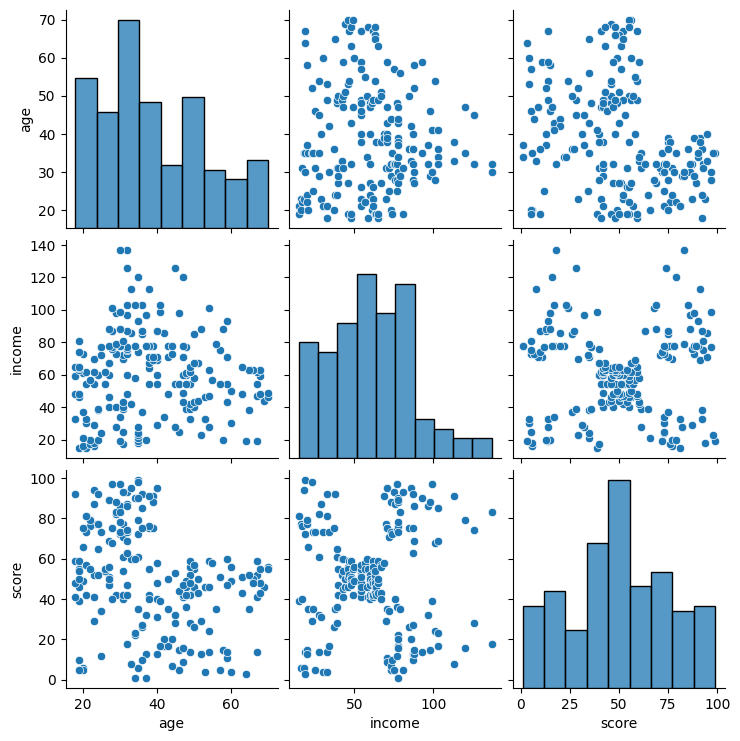

In [ ]:
seaborn.pairplot (df[['age', 'income','score']])

In [ ]:
import sklearn.cluster as cluster

In [ ]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans = kmeans.fit(df[['score','income']])

In [ ]:
#Finding out the centroids
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [17.11428571, 88.2       ],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273]])

In [ ]:
kmeans = kmeans.fit(df[['income','score']])

In [ ]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

In [ ]:
df['income_clusters'] = kmeans.labels_

In [ ]:
df

,CustomerID,gender,age,income,score,income_clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [ ]:
# counting in which cluster how many values
df['income_clusters'].value_counts()

,count
income_clusters,
0,81
1,39
2,35
3,23
4,22


<Axes: xlabel='score', ylabel='income'>

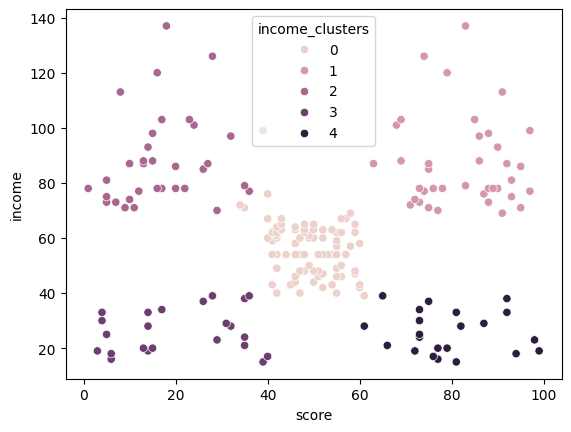

In [ ]:
seaborn.scatterplot(x= 'score', y = 'income', hue= 'income_clusters', data= df)

<Axes: xlabel='income', ylabel='score'>

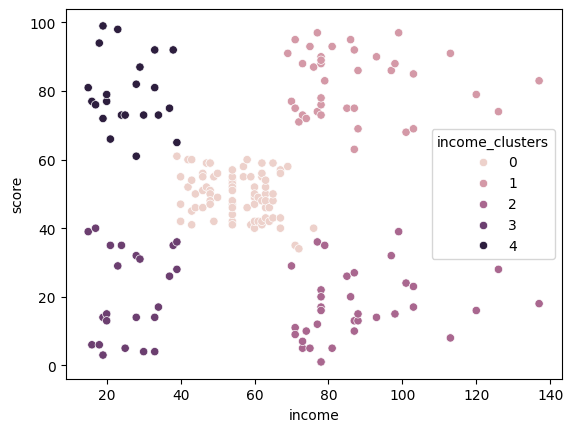

In [ ]:
seaborn.scatterplot(x= 'income', y = 'score', hue= 'income_clusters', data= df)

In [ ]:
#trying with 2 clusters
kmeans = cluster.KMeans(n_clusters = 2)

In [ ]:
kmeans = kmeans.fit(df[['age','score']])

In [ ]:
kmeans.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [ ]:
df['age_clusters'] = kmeans.labels_

In [ ]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,3,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,2,1


In [ ]:
df['age_clusters'].value_counts()

,count
age_clusters,
1,115
0,85


In [ ]:
df

,CustomerID,gender,age,income,score,income_clusters,age_clusters
0,1,Male,19,15,39,3,1
1,2,Male,21,15,81,4,0
2,3,Female,20,16,6,3,1
3,4,Female,23,16,77,4,0
4,5,Female,31,17,40,3,1
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,2,1
197,198,Male,32,126,74,1,0
198,199,Male,32,137,18,2,1


<Axes: xlabel='age', ylabel='score'>

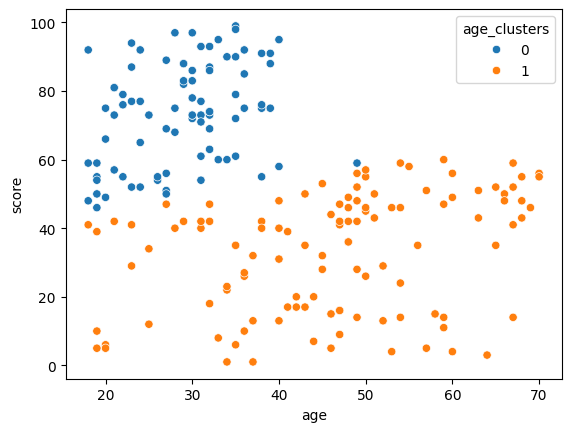

In [ ]:
seaborn.scatterplot(x= 'age', y = 'score', hue= 'age_clusters', data= df)

In [ ]:
#from sklearn.cluster import kMeans
from sklearn.cluster import KMeans

In [ ]:
# to calculate 12 clusters
k_range = range(1,12)
wcss = []

In [ ]:
# implementing for loop for 12 clusters to find out wcss value for each cluster
# adding wcss values of clusters in wcss array
for k in k_range:
    km= KMeans(n_clusters =k)
    km.fit(df[['income','score']])
    wcss.append (km.inertia_)

In [ ]:
wcss

[269981.28000000014,
 183811.2827701642,
 106348.37306211119,
 73880.64496247198,
 44448.45544793369,
 38858.959975143895,
 33350.695778415124,
 30200.289692945924,
 23248.1028893587,
 21104.264059714787,
 18548.354361671354]

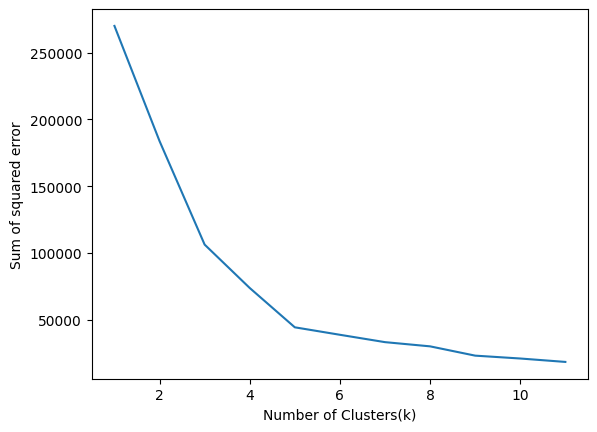

In [ ]:
plt.xlabel ('Number of Clusters(k)')
plt.ylabel ('Sum of squared error')
plt.plot (k_range , wcss)